---
# **Introduction To Machine Learning**
## **Supervised Learning (= classification):**

*   **k-Nearest Neighbor (kNN)**
*   naive Bayesian (NB)
*   Decision Tree (DT): C4.5, CART, etc.
*   AdaBoost
*   Support Vector Machine (SVM)
---

kNN is a simple algorithm that stores all available cases and classifies new cases based on a distance metric (e.g., Euclidean distance metric).
![Distance Formula](https://miro.medium.com/max/626/1*whWqafWqGnpM-_3SDEypPA.png)


## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>

<b>The Banknote Authentication Dataset:</b> There are 1372 items (images of banknotes — think Euro or dollar bill). There are 4 predictor variables (variance of image, skewness, kurtosis, entropy). The variable to predict is encoded as 0 (authentic) or 1 (forgery). 

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

<b> ASSIGNMENT: </b> Use Iris data, which is a small, widely-used, easy classic dataset from Fisher, 1936. 

https://archive.ics.uci.edu/dataset/53/iris

# ANUSHA YARRASANI

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

#### <font color = blue>Import the Dataset

In [2]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_table('iris.csv', sep = ',', header = None, names = col_names)
df.tail(7)

,sepal_length,sepal_width,petal_length,petal_width,species
144,6.8,3.2,5.9,2.3,virginica
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3,5.2,2.3,virginica
147,6.3,2.5,5,1.9,virginica
148,6.5,3,5.2,2,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3,5.1,1.8,virginica


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Summary and Visualization </font>

#### <font color = blue>Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  151 non-null    object
 1   sepal_width   151 non-null    object
 2   petal_length  151 non-null    object
 3   petal_width   151 non-null    object
 4   species       151 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


#### <font color = blue> Visualize the whole dataset

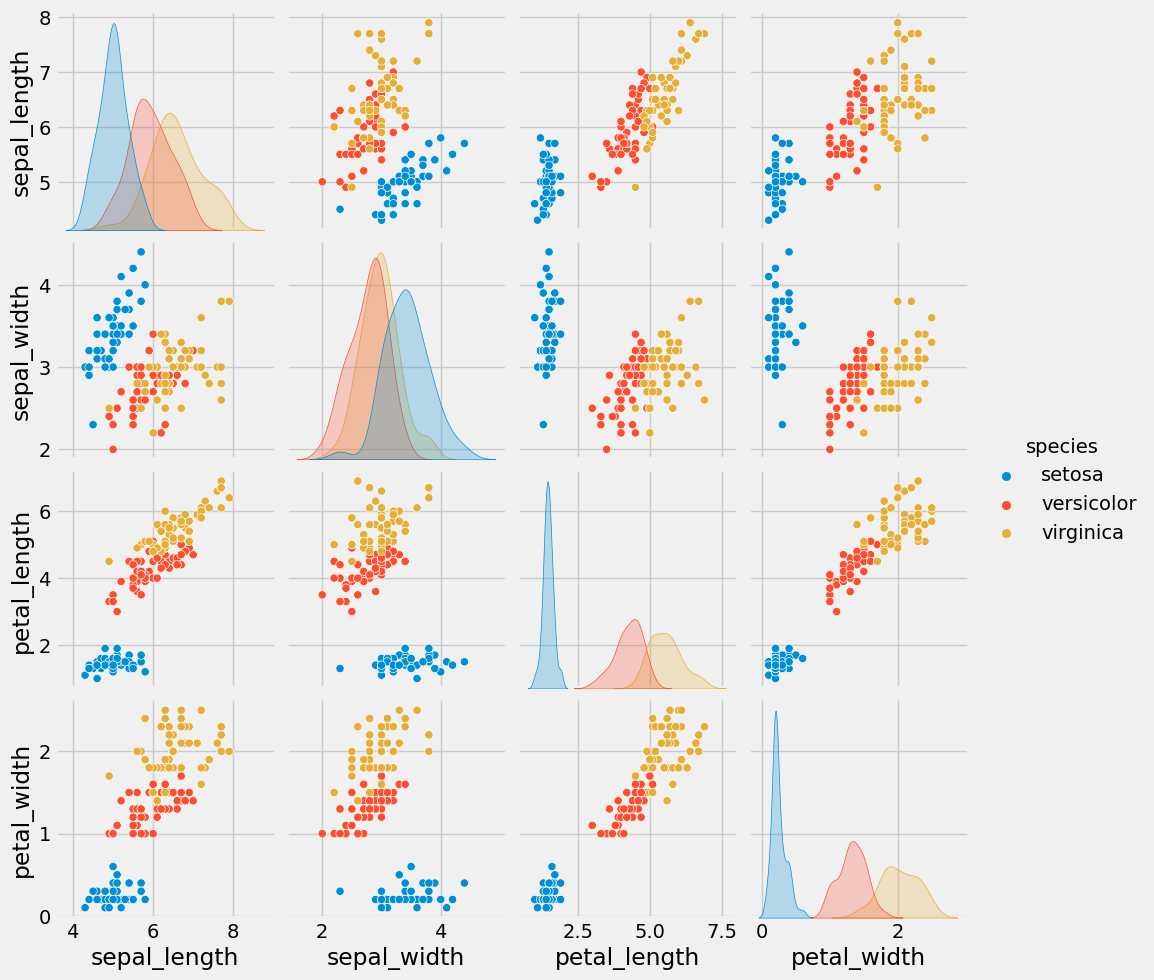

In [4]:
iris = sns.load_dataset("iris")
plt.style.use('fivethirtyeight')
sns.pairplot(iris, hue='species')

#### <font color = blue> Visualize the Label Class

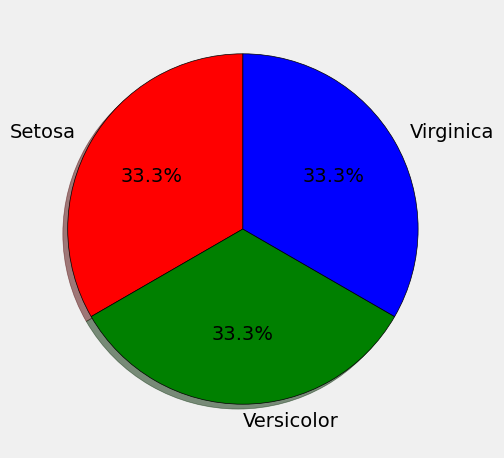

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['Target'] = iris.target

# Count the number of samples in each class
setosa = data[data['Target'] == 0].shape[0]
versicolor = data[data['Target'] == 1].shape[0]
virginica = data[data['Target'] == 2].shape[0]

label = [setosa, versicolor, virginica]

# Create a pie chart
plt.pie(label, labels=['Setosa', 'Versicolor', 'Virginica'], shadow=True, wedgeprops={'edgecolor': 'black'},
        autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.tight_layout()
plt.show()

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>
In this part, we did data preprocessing. firstly, we define our predictor and target attribute. Then we oversee missing values because we found some missing values in the first three columns. To deal with the missing value we use Simple Imputer from sklearn and apply the mean strategy to our predictor data. After that, we apply Feature Scaling on our data as we know Feature Scaling is the most important part of data preprocessing. If we see our dataset, then some attribute has information in Numeric value some value is extremely high, and some are exceptionally low if we see the Variance of Image and Entropy. This will cause some issues in our machinery model to solve that problem we set all values on the same scale there are two methods to solve that problem and we use Standard Scaler. In the end, we split our data for training and testing. And ratio for training and testing is 0.8 and 0.2, respectively.
> Define Predictor and target <br> Attribute Dealing with Missing Value <br> Feature Scaling <br> Split the Data into Train and Test

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Define Predictor and target Attribute </font>

In [6]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
print('predictor attribute', X)
print('target attribute', Y)

predictor attribute [['sepal_length' 'sepal_width' 'petal_length' 'petal_width']
 ['5.1' '3.5' '1.4' '0.2']
 ['4.9' '3' '1.4' '0.2']
 ['4.7' '3.2' '1.3' '0.2']
 ['4.6' '3.1' '1.5' '0.2']
 ['5' '3.6' '1.4' '0.2']
 ['5.4' '3.9' '1.7' '0.4']
 ['4.6' '3.4' '1.4' '0.3']
 ['5' '3.4' '1.5' '0.2']
 ['4.4' '2.9' '1.4' '0.2']
 ['4.9' '3.1' '1.5' '0.1']
 ['5.4' '3.7' '1.5' '0.2']
 ['4.8' '3.4' '1.6' '0.2']
 ['4.8' '3' '1.4' '0.1']
 ['4.3' '3' '1.1' '0.1']
 ['5.8' '4' '1.2' '0.2']
 ['5.7' '4.4' '1.5' '0.4']
 ['5.4' '3.9' '1.3' '0.4']
 ['5.1' '3.5' '1.4' '0.3']
 ['5.7' '3.8' '1.7' '0.3']
 ['5.1' '3.8' '1.5' '0.3']
 ['5.4' '3.4' '1.7' '0.2']
 ['5.1' '3.7' '1.5' '0.4']
 ['4.6' '3.6' '1' '0.2']
 ['5.1' '3.3' '1.7' '0.5']
 ['4.8' '3.4' '1.9' '0.2']
 ['5' '3' '1.6' '0.2']
 ['5' '3.4' '1.6' '0.4']
 ['5.2' '3.5' '1.5' '0.2']
 ['5.2' '3.4' '1.4' '0.2']
 ['4.7' '3.2' '1.6' '0.2']
 ['4.8' '3.1' '1.6' '0.2']
 ['5.4' '3.4' '1.5' '0.4']
 ['5.2' '4.1' '1.5' '0.1']
 ['5.5' '4.2' '1.4' '0.2']
 ['4.9' '3.1' '1.5' '

NameError: name 'Y' is not defined

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Dealing with Missing Value </font>

#### <font color = blue> Check the Missing Value

In [7]:
df.isnull().sum()          

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')       
imputer  = imputer.fit(X)
X = imputer.transform(X)
X

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'sepal_length'

### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Feature Scaling </font>

In [100]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[-0.901, 1.019, -1.340, -1.315],
       [-1.143, -0.132, -1.340, -1.315],
       [-1.385, 0.328, -1.397, -1.315],
       [-1.507, 0.098, -1.283, -1.315],
       [-1.022, 1.249, -1.340, -1.315],
       [-0.537, 1.940, -1.170, -1.052],
       [-1.507, 0.789, -1.340, -1.184],
       [-1.022, 0.789, -1.283, -1.315],
       [-1.749, -0.362, -1.340, -1.315],
       [-1.143, 0.098, -1.283, -1.447],
       [-0.537, 1.479, -1.283, -1.315],
       [-1.264, 0.789, -1.227, -1.315],
       [-1.264, -0.132, -1.340, -1.447],
       [-1.870, -0.132, -1.511, -1.447],
       [-0.053, 2.170, -1.454, -1.315],
       [-0.174, 3.091, -1.283, -1.052],
       [-0.537, 1.940, -1.397, -1.052],
       [-0.901, 1.019, -1.340, -1.184],
       [-0.174, 1.710, -1.170, -1.184],
       [-0.901, 1.710, -1.283, -1.184],
       [-0.537, 0.789, -1.170, -1.315],
       [-0.901, 1.479, -1.283, -1.052],
       [-1.507, 1.249, -1.568, -1.315],
       [-0.901, 0.559, -1.170, -0.921],
       [-1.264, 0.789, -1.056, -1.31

### <font color = #27C3E5> 2.4: </font> <font color = #41EA46> Split the Data into Train and Test </font>

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### <font color = blue> Training Data

In [102]:
print("X_train", X_train.shape)
print("Y_train", y_train.shape)

X_train (105, 4)
Y_train (105,)


#### <font color = blue> Testing Data

In [103]:
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (45, 4)
X_test (45,)


## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Build k-Nearest Neighbors </font>
In this part, we build k-Nearest Neighbors from scratch and with sklearn as well.

### <font color = #27C3E5> 3.1: </font> <font color = #41EA46> Implementation from Scratch </font>

#### <font color = blue> Build Model </font>

In [104]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_idx = np.argsort(distances)[: self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

#### <font color = blue> Inititialize Model </font>

In [105]:
knn_scratch = KNN( k = 5)

#### <font color = blue> Fit the Training Data into Model</font>

In [106]:
knn_scratch.fit(X_train, y_train)

#### <font color = blue> Predict the Test Data</font>

In [107]:
Y_predict_scratch = knn_scratch.predict(X_test)
Y_predict_scratch

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype='<U10')

#### <font color = blue> Accuracy Score</font>

In [108]:
Accuracy_Scratch = accuracy_score(Y_predict_scratch, y_test)
print('Accuracy Score:', Accuracy_Scratch)

Accuracy Score: 1.0


### <font color = #27C3E5> 3.2: </font> <font color = #41EA46> Implementation with Scikit-Learn </font>

#### <font color = blue> Import Model from Scikit-learn

In [109]:
from sklearn.neighbors import KNeighborsClassifier

#### <font color = blue> Initialize the Model

In [110]:
knn_Sklearn = KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski', p= 2)

#### <font color = blue> Fit the Training Data into Model

In [111]:
knn_Sklearn.fit(X_train, y_train)

KNeighborsClassifier()

#### <font color = blue> Predict the Test Data</font>

In [112]:
Y_predict_Sklearn = knn_Sklearn.predict(X_test)
Y_predict_Sklearn

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype=object)

#### <font color = blue> Accuracy Score</font>

In [113]:
Accuracy_Sklearn = accuracy_score(Y_predict_Sklearn, y_test)
print('Accuracy Score:', Accuracy_Sklearn)

Accuracy Score: 1.0


### <font color = #27C3E5> 3.3: </font> <font color = #41EA46> Comparison (Scratch vs. Scikit-Learn) </font>

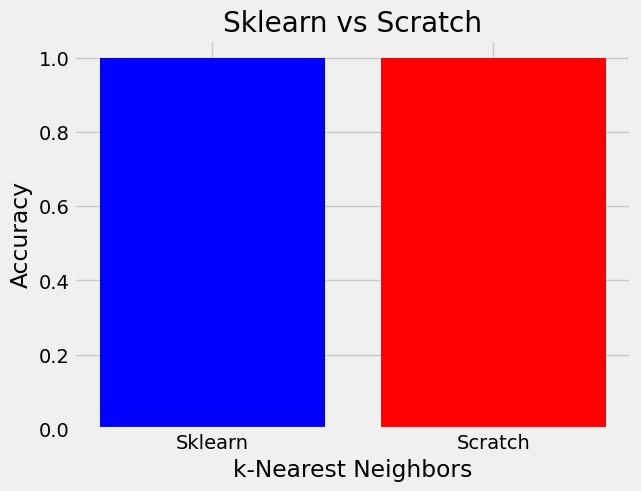

In [114]:
accuracy = [Accuracy_Sklearn, Accuracy_Scratch]
label = ["Sklearn", "Scratch"]
plt.bar(label, accuracy, color = ['blue', 'red'])
plt.title("Sklearn vs Scratch")
plt.xlabel("k-Nearest Neighbors")
plt.ylabel("Accuracy")
plt.show()

> As we can see 100% accuracy from both implementation

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>
In this part, we evaluate the k-Nearest Neighbors Scratch model (it's doesn't matter because 100% result from both implementation). first we make confusion matrix and we visualize the score following ("Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error" and "Roc Area").

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46> Confusion Matrix</font>

Micro Precision:  1.0
Macro Precision:  1.0


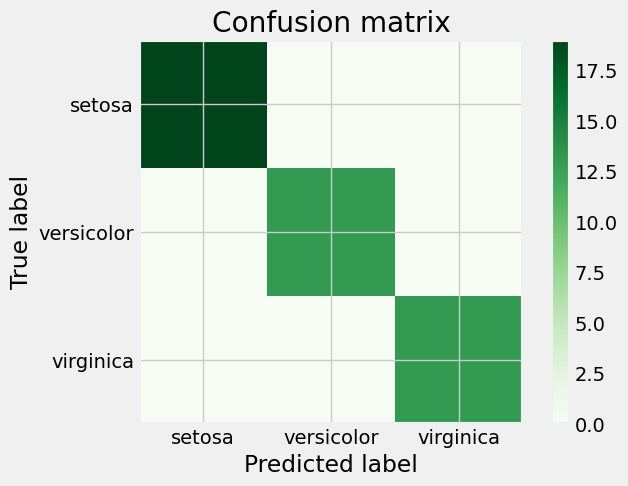

In [115]:
# Predictions
y_pred = knn_Sklearn.predict(X_test)

 # Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Display confusion matrix
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks(np.arange(3), iris.target_names)
plt.yticks(np.arange(3), iris.target_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Calculate precision for each class
precisions = [cm[i,i] / cm[i].sum() for i in range(len(cm))]

# Micro-average precision 
micro_precision = sum(cm.diagonal()) / cm.sum()

# Macro-average precision
macro_precision = sum(precisions) / len(precisions)

print('Micro Precision: ', micro_precision)
print('Macro Precision: ', macro_precision)

### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  Evaluate the Results </font>

#### <font color = blue>4.2.1: Calculate the Results

In [116]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='macro')  # You can change the average parameter as needed.
recall = recall_score(y_test, y_pred, average='macro')  # You can change the average parameter as needed.
f1 = f1_score(y_test, y_pred, average='macro')  # You can change the average parameter as needed.

print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
specificity = TN / (TN + FP)
print('Specificity:', specificity)

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # You can change the multi_class parameter as needed.
print('Roc: ', roc_auc)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
Specificity: 1.0
Roc:  1.0


#### <font color = blue>4.2.2: Visualize the Results

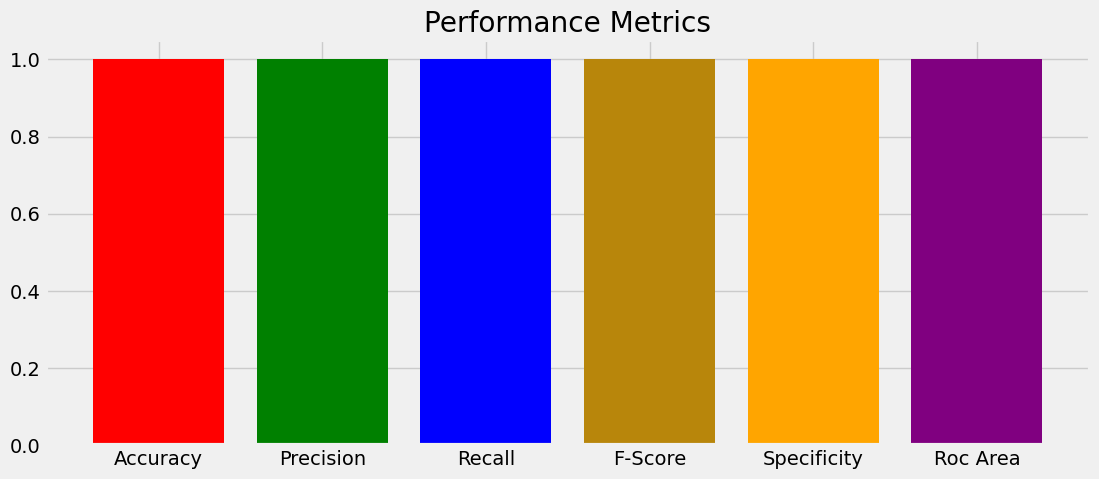

In [117]:
plt.figure(figsize=(12, 5))
result = [accuracy, precision, recall, f1, specificity, roc_auc]
label = ["Accuracy", "Precision", "Recall", "F-Score", "Specificity", "Roc Area"]
colors = ['red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple']

# Plot the metrics
plt.bar(label, result, color=colors)
plt.title('Performance Metrics')
plt.show()

## <font color = #950CDF> Part 5: </font> <font color = #4854E8> Making A Single Prediction </font>
In this part, we make a single Prediction based on new observation

In [123]:
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
pd.DataFrame([['5', '3.5', '1.6', '0.6', '?']], columns =col)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5,3.5,1.6,0.6,?


In [127]:
input_data = np.array([[5.0, 3.5, 1.6, 0.6]])
new_prediction = knn_scratch.predict(sc_X.transform(input_data))

In [132]:
if new_prediction[0] == 0:
    print("Setosa")
elif new_prediction[0] == 1:
    print("Versicolor")
else:
    print("Virginica")

Virginica
